<div style="max-width:66ch;">

# Lecture notes - logistic regression

This is the lecture note for **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to logistic regression. I encourage you to read further about logistic regression. </p>

Read more:

- [Logistic regression wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)
- [ISLRv2 pp 129-141](https://www.statlearning.com/)
- [Precision, accuracy, recall, F-score](https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/)
- [Precision and recall wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)


</div>


In [23]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 


<div style="max-width:66ch;">

## EDA

Start with exploratory data analysis to understand the data we're dealing with. 


</div>

In [24]:
df = pd.read_csv("../data/default.csv")
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,10000.0,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308386,2654.322576
income,10000.0,33516.981876,13336.639563,771.967729,21340.462903,34552.644802,43807.729272,73554.233495


In [27]:
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [28]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

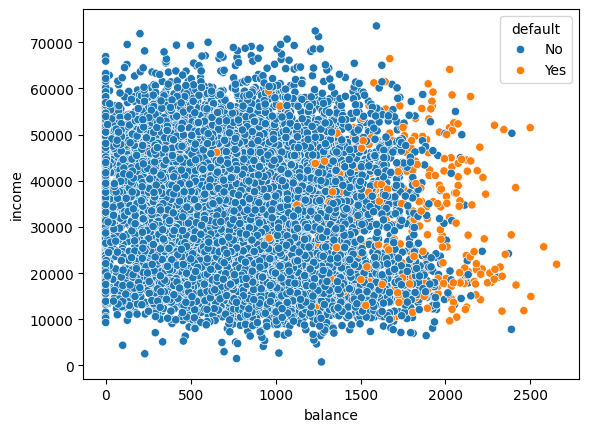

In [29]:
sns.scatterplot(data=df, x="balance", y = "income", hue = "default")
# we see that the data is very closely packed, which will be hard to train a good model for finding default 
# also the data is highly imbalanced, which makes it harder to get a good model

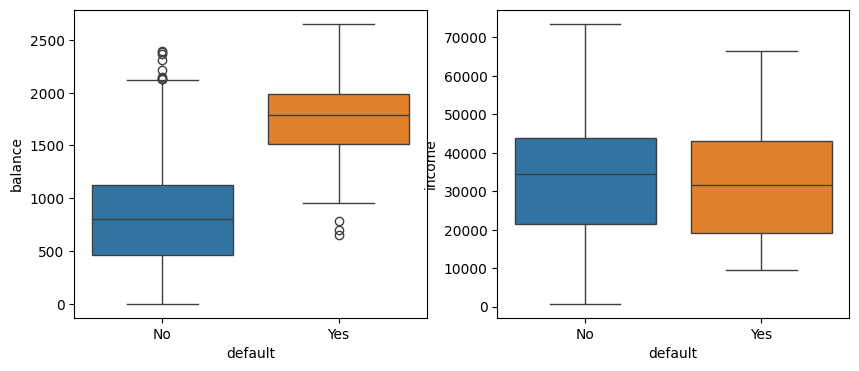

In [30]:
fig, ax = plt.subplots(1, 2, dpi=100, figsize = (10,4))

for ax, col in zip(ax, ["balance", "income"]):
    sns.boxplot(data=df, x="default", y=col, ax=ax, hue="default")


<div style="max-width:66ch;">

## Dummy encoding

The features default and student are categorical. In order to make calculations on those variables, we need to represent them using dummy variables. This is called dummy encoding. 

Note that we have dropped default_No and student_No as these variables can be infered due to boolean values of either True or False. If keeping the original default_No and student_No we would have one hot encoding and not dummy encoding.   

Dummy encoding is more preferable as we still have same amount of information but have less dimensions. The more dimensions he have the higher risk for multicollinearity and the curse of dimensionality.

Also keep in mind that we should have 0s and 1s and not True or False. 

</div>

In [31]:
df = pd.get_dummies(df, columns = ["default", "student"], drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [35]:
# change False and True to 0 and 1
df[["default_Yes", "student_Yes"]] = df[["default_Yes", "student_Yes"]].astype(int)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


<div style="max-width:66ch;">

## Logistic regression 

Note that logistic regression actually is a classification algorithm and not a regression algorithm although its name. This is due to historical reason and its closeness to linear regression when we derive the formulas. If you're interested you should read more on the derivation, but it includes the logistic function, odds, odds ratio and maximum likelihood estimation. 

Important note is that it requires an numerical optimization algorithm such as stochastic gradient descent to solve for the parameters, and these algorithms require scaling of the data. 

</div>

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop("default_Yes", axis=1), df["default_Yes"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# original logistic regression model
# logistic regression can mathematically be derived from linear regression but using some other functions and adding some probability theory in. 
# also we have similar l1, l2 and elastic net for logistic regression as for linear regression
model = LogisticRegression(penalty=None)
model.fit(scaled_X_train, y_train)
model.coef_, model.intercept_

(array([[ 2.888348  ,  0.00687543, -0.28952422]]), array([-6.36240853]))

In [38]:
test_sample = pd.DataFrame({"balance": [1500, 1500], "income": [
                           40000, 40000], "student_Yes": [1, 0]})

print(test_sample)
# only difference is that one is student and the other is not
scaled_test_sample = scaler.transform(test_sample)

# first column is -1 label i.e. not default, second column is label 1 i.e. default
model.predict_proba(scaled_test_sample)
# we see that being student decreases the chance of getting default 

   balance  income  student_Yes
0     1500   40000            1
1     1500   40000            0


array([[0.94485389, 0.05514611],
       [0.90084904, 0.09915096]])

In [39]:
y_pred_probability = model.predict_proba(scaled_X_test)
y_pred_probability[:5]

array([[9.30448543e-01, 6.95514567e-02],
       [9.98551323e-01, 1.44867725e-03],
       [9.99985411e-01, 1.45887899e-05],
       [9.99971177e-01, 2.88231783e-05],
       [9.54574467e-01, 4.54255328e-02]])

<div style="max-width:66ch;">

## Evaluation metrics for classification

Confusion matrix

<table border="1" style="display:inline-block; text-align:left;">
    <thead>
        <tr style="background-color: #174A7E; color: white;">
            <th></th>
            <th>Pos prediction</th>
            <th>Neg prediction</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Pos class</td>
            <td>TP</td>
            <td>FN</td>
        </tr>
        <tr>
            <td>Neg class</td>
            <td>FP</td>
            <td>TN</td>
        </tr>
    </tbody>
</table>


- accuracy - ratio of correct predictions to all predictions
    - bad measure when, dataset class is imbalanced, e.g. a fraud model that always predicts non fraudulent could achieve accuracy of close to 1 without having any predictive power. 
- precision - number of positive class predictions that belong to positive class
    - good measure when FP is allowed to be higher e.g. email spam classification 
- recall - sensitivity - number of positive class predictions out of all positive examples 
    - good measure when there is high cost with FN e.g. sick patient of a contageous disease such as Covid-19 quick test
- $F_1$ score - harmonic mean between precision and recall 
    - seeks a balance between precision, recall and uneven class distributions

$ acc = \frac{TP+TN}{Total} $

$ prec = \frac{TP}{TP+FP}$

$ rec = \frac{TP}{TP+FN}$

$ F_1 = 2\frac{prec\cdot recall}{prec + rec}$

</div>

Accuracy: 0.973


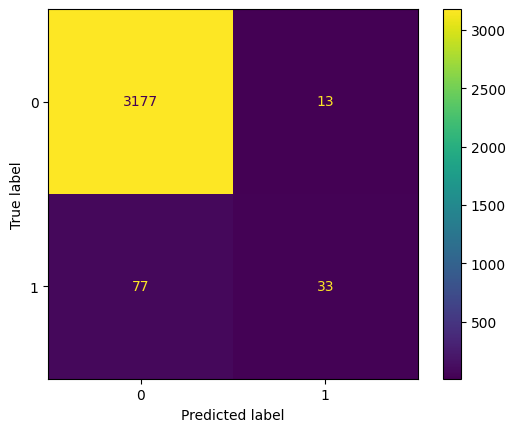

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(scaled_X_test)
acc = accuracy_score(y_test, y_pred)
# note that the accuracy is very high, which is because of the accuracy paradox as the data is highly imbalanced. 
# this means that we could make a model that always classifies negative on default, and achieve very high accuracy
print(f"Accuracy: {acc:.3f}")
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()

In [41]:
accuracy = (3178+33)/(3178+12+77+33)
recall = 33/(33+77)
precisiion = 33/(33+12)
f1 = 2*recall*precisiion/(recall+precisiion)
accuracy, recall, precisiion, f1

(0.973030303030303, 0.3, 0.7333333333333333, 0.4258064516129032)

In [42]:
print(classification_report(y_test, y_pred))
# recall and f1 score is very bad here for label 1 indicating that the model having a lot of FN, 
# which means it tends to classify someone that should default as not default
# this can also be seen in the confusion matrix

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.72      0.30      0.42       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300



<div style="max-width:66ch;">

## Summary

In this lecture we've covered the concepts of logistic regression which is a classification algorithm. In order to work with features that are not numbers (categorical features) we can dummy encode them. We've also worked with unbalanced dataset, and understood that accuracy alone is not a sufficiently accurate evaluation method. Instead we go into recall and f1 score. The confusion matrix is also an important metric to study to see true positive, true negative, false positive and false negative. 

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
